<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/ABC_CarResale_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Resale company:

ABC_car_resale is one of the leading used-car buying and selling platform in India.

In [67]:
# Initializing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [68]:
# Downloading dataset
!gdown 15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa

Downloading...
From: https://drive.google.com/uc?id=15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa
To: /content/cars24-car-price.csv
100% 1.79M/1.79M [00:00<00:00, 62.5MB/s]


# **EDA**

In [69]:
# Loading Dataset
df=pd.read_csv("cars24-car-price.csv")
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [70]:
df.shape

(19980, 11)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [72]:
df.duplicated().sum()

138

In [73]:
df[df.duplicated()]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
271,Mahindra TUV 300 T4,4.50,2016.0,Individual,70000,Diesel,Manual,18.49,1493.0,100.00,7.0
469,Maruti Baleno Delta Automatic,6.86,2019.0,Individual,5000,Petrol,Automatic,21.40,1197.0,83.10,5.0
1771,Maruti Swift Dzire VDI,6.80,2017.0,Individual,50000,Diesel,Manual,28.40,1248.0,74.02,5.0
1826,Maruti S-Cross 2017-2020 Sigma DDiS 200 SH,7.40,2017.0,Individual,70000,Diesel,Manual,25.10,1248.0,88.50,5.0
1873,Maruti Wagon R LXI Minor,1.50,2008.0,Individual,100000,Petrol,Manual,18.90,1061.0,67.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...
19633,Tata Nexon 1.5 Revotorq XZ Plus,8.95,2018.0,Dealer,43000,Diesel,Manual,21.50,1497.0,108.50,5.0
19674,Hyundai i20 1.2 Magna,3.75,2010.0,Dealer,64000,Petrol,Manual,18.50,1197.0,80.00,5.0
19865,Maruti Wagon R LXI CNG,4.50,2015.0,Individual,50000,CNG,Manual,26.60,998.0,58.16,5.0
19938,Hyundai Grand i10 Sportz,4.50,2015.0,Individual,30000,Petrol,Manual,18.90,1197.0,82.00,5.0


In [74]:
df[df["full_name"]=="Mahindra TUV 300 T4"]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
161,Mahindra TUV 300 T4,4.50,2016.0,Individual,70000,Diesel,Manual,18.49,1493.0,100.0,7.0
271,Mahindra TUV 300 T4,4.50,2016.0,Individual,70000,Diesel,Manual,18.49,1493.0,100.0,7.0
10087,Mahindra TUV 300 T4,7.00,2017.0,Individual,50000,Diesel,Manual,18.49,1493.0,100.0,7.0
11970,Mahindra TUV 300 T4,6.10,2017.0,Individual,40000,Diesel,Manual,18.49,1493.0,100.0,7.0
13573,Mahindra TUV 300 T4,5.55,2017.0,Dealer,72456,Diesel,Manual,18.49,1493.0,100.0,7.0
14439,Mahindra TUV 300 T4,4.75,2016.0,Dealer,55034,Diesel,Manual,18.49,1493.0,100.0,7.0
17555,Mahindra TUV 300 T4,5.50,2015.0,Dealer,99000,Diesel,Manual,18.49,1493.0,100.0,7.0


In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19842.000000,19842.000000,1.984200e+04,19842.000000,19842.000000,19842.000000,19842.000000
mean,7.383214,2014.522024,5.826741e+04,19.349419,1475.851248,97.796170,5.318163
std,9.100751,3.251320,5.179987e+04,4.619978,519.717819,45.000832,0.836170
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.118275e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,110.400000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [77]:
df.describe(include="object")

,full_name,seller_type,fuel_type,transmission_type
count,19842,19842,19842,19842
unique,3321,3,5,2
top,Maruti Swift Dzire VDI,Dealer,Diesel,Manual
freq,206,11898,9751,15929


In [78]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

We found out from above that

1.   There may be oultiers in selling_price,mileage,engine,max_power ,considering min,max values
2. Most cars of 2014,2015 model
3. Most cars are around 50000 to 60000 km driven
4. Most cars mileage is 19 and 5 seater cars
5. Most reselling model is maruti swift dzire vdi,fuel type diesel,manual transmission
6. Make and model are combined as full_name

Checking Each column for type of data and outliers

<Axes: xlabel='selling_price'>

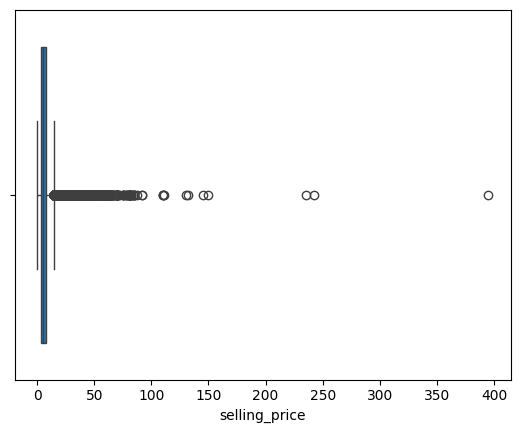

In [79]:
sns.boxplot(data=df,x='selling_price')

<Axes: xlabel='selling_price', ylabel='Density'>

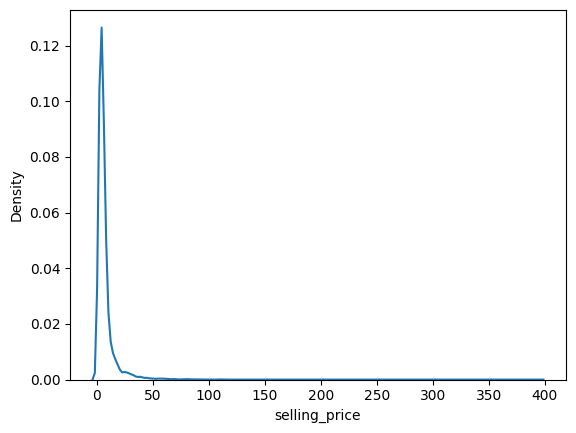

In [80]:
sns.kdeplot(data=df,x="selling_price")

In [81]:
iqrs=np.percentile(df["selling_price"],75)-np.percentile(df["selling_price"],25)
max_outlier=1.5*iqrs+np.percentile(df['selling_price'],75)
min_outlier = 1.5*iqrs-np.percentile(df["selling_price"],25)
max_outlier,min_outlier

(14.524999999999999, 3.274999999999999)

In [82]:
df[df['selling_price']<3.27].shape

(4764, 11)

In [83]:
df[df['selling_price']>50].shape

(149, 11)

<Axes: xlabel='mileage'>

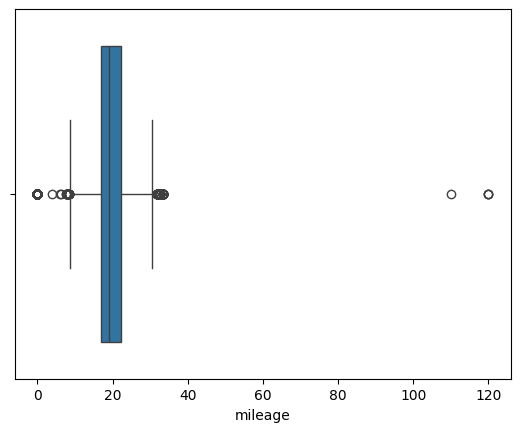

In [84]:
sns.boxplot(data=df,x="mileage")

In [85]:
df[df["mileage"]>35].shape

(4, 11)

<Axes: xlabel='mileage', ylabel='Density'>

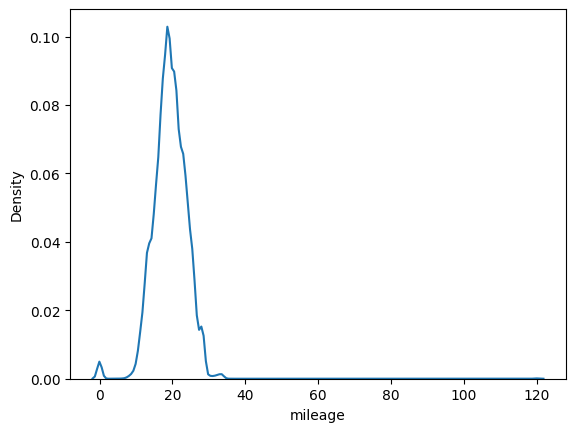

In [86]:
sns.kdeplot(data=df,x="mileage")

Need to evaluate:
1. spike around zero
2. outlier is around mileage greater than 35

In [87]:
df[df['mileage']>34]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
11966,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0
15684,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
17782,Mahindra e2o T2,4.50,2015.0,Dealer,40000,Electric,Automatic,120.0,0.000000,25.5,5.0
18401,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0


Electric so mileage is different so the units will be

In [88]:
df[df['mileage']<5].sort_values(by='mileage',ascending=False)

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
4967,Ferrari GTC4Lusso T,395.00,2019.0,Dealer,3800,Petrol,Automatic,4.0,3855.000000,601.0,4.0
10946,Hyundai Santro Xing GL,1.34,2009.0,Dealer,36000,Petrol,Manual,0.0,1086.000000,62.0,5.0
13637,Land Rover Range Rover Evoque 2.0 R-Dynamic SE...,21.50,2013.0,Dealer,58000,Diesel,Automatic,0.0,1999.000000,245.4,5.0
13863,Porsche Cayenne Base,132.00,2019.0,Individual,5000,Petrol,Automatic,0.0,2995.000000,340.0,5.0
13880,Hyundai Santro GLS II - Euro II,1.30,2008.0,Dealer,79000,Petrol,Manual,0.0,1476.327401,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6784,Toyota Innova Crysta 2.4 VX 7 STR,21.00,2020.0,Individual,2530,Diesel,Manual,0.0,2393.000000,148.0,7.0
6808,Honda City 1.5 GXI,2.25,2006.0,Dealer,75277,Petrol,Manual,0.0,1476.327401,5.0,5.0
6887,Hyundai Santro Xing XP,1.20,2007.0,Individual,90000,Petrol,Manual,0.0,1086.000000,5.0,5.0
7532,Hyundai Santro 2018 New,1.95,2007.0,Dealer,32000,Petrol,Manual,0.0,1476.327401,5.0,5.0


Zero mileage doesn't make sense
we can impute these rows later as this doesn't make sense

In [89]:
df[df['mileage']==0.0].shape

(159, 11)

<Axes: >

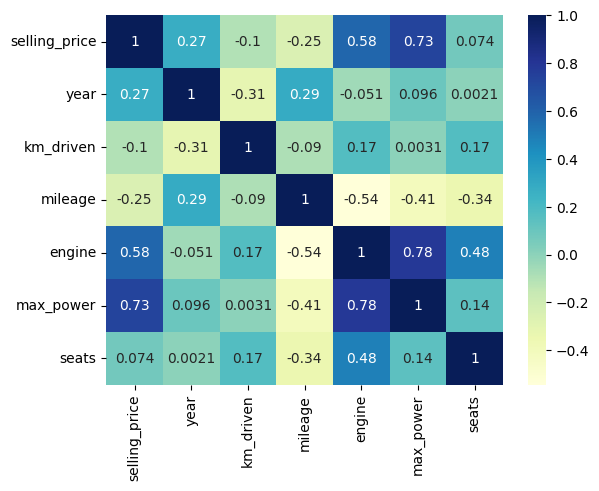

In [90]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')

positive corr:
1.selling price engine,max power engine,max selling
negative:
1.year kmdriven
2.mileage engine
3.mileage maxpower
4.mileage seats

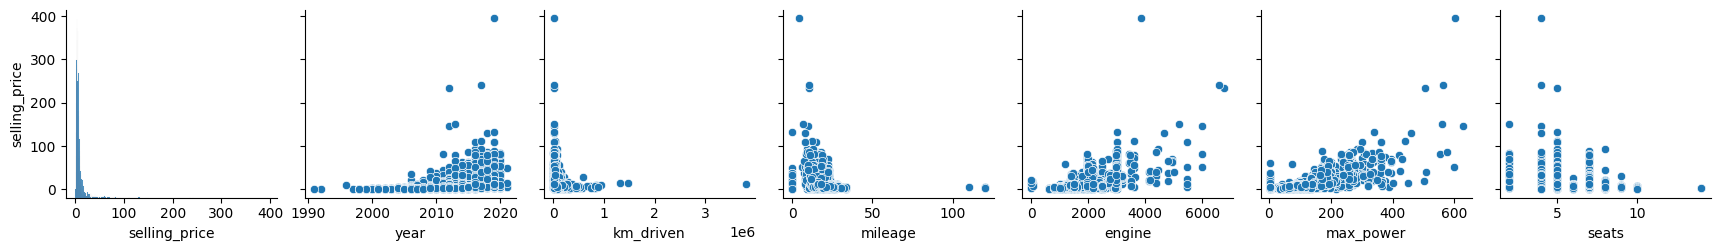

In [91]:
sns.pairplot(df,y_vars=['selling_price'])

selling price and mileage has some normal distribution

<Axes: xlabel='mileage', ylabel='selling_price'>

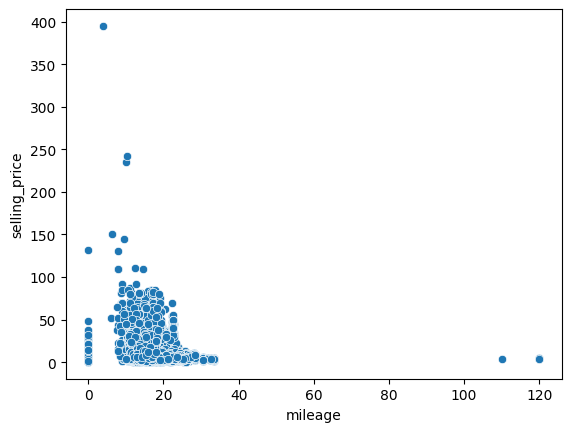

In [96]:
sns.scatterplot(data=df,x='mileage',y='selling_price')

In [114]:
df[(df['mileage']>25) & (df['selling_price']<=50)]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
17,Maruti Ciaz ZDi Plus SHVS,6.50,2016.0,Dealer,76000,Diesel,Manual,28.09,1248.0,88.50,5.0
18,Maruti Swift VDI BSIV,6.27,2016.0,Individual,20000,Diesel,Manual,25.20,1248.0,74.00,5.0
20,Maruti Swift VDI,4.25,2014.0,Dealer,62200,Diesel,Manual,28.40,1248.0,74.00,5.0
31,Maruti Swift Dzire VDI,6.00,2015.0,Individual,90000,Diesel,Manual,26.59,1248.0,74.00,5.0
32,Maruti Swift Dzire LDI,3.90,2013.0,Dealer,45000,Diesel,Manual,26.59,1248.0,74.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...
19944,Honda Jazz 1.5 VX i DTEC,6.40,2015.0,Individual,90000,Diesel,Manual,27.30,1498.0,98.60,5.0
19951,Maruti Swift Dzire AMT ZDI Plus,8.35,2017.0,Dealer,30798,Diesel,Automatic,28.40,1248.0,74.02,5.0
19962,Maruti Alto 800 CNG LXI,2.75,2014.0,Dealer,44000,CNG,Manual,30.46,796.0,47.30,5.0
19967,Honda Amaze E i-DTEC,5.25,2015.0,Dealer,28000,Diesel,Manual,25.80,1498.0,98.60,5.0


In [115]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [117]:
df['make']=df['full_name'].apply(lambda x:x.split(' ')[0])
df['model']=df['full_name'].apply(lambda x:' '.join(x.split(' ')[1:]))


In [119]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


In [120]:
df.drop(columns='full_name',inplace=True)
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std
1,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta
2,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta
3,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI
4,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


In [121]:
df.shape

(19842, 12)

(-10.0, 50.0)

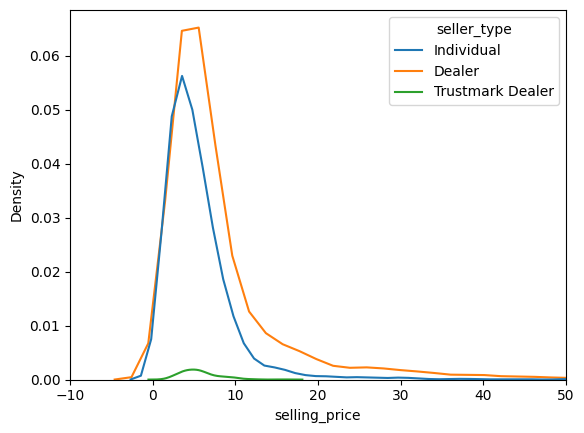

In [133]:
sns.kdeplot(data=df,x='selling_price',hue='seller_type')
plt.xlim(-10,50)

In [131]:
df['seller_type'].value_counts()

seller_type
Dealer              11898
Individual           7754
Trustmark Dealer      190
Name: count, dtype: int64

In [136]:
df['log_sell_price']=np.log(df['selling_price'])
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model,log_sell_price
0,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std,0.182322
1,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta,1.704748
2,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta,0.765468
3,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI,0.815365
4,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1.740466


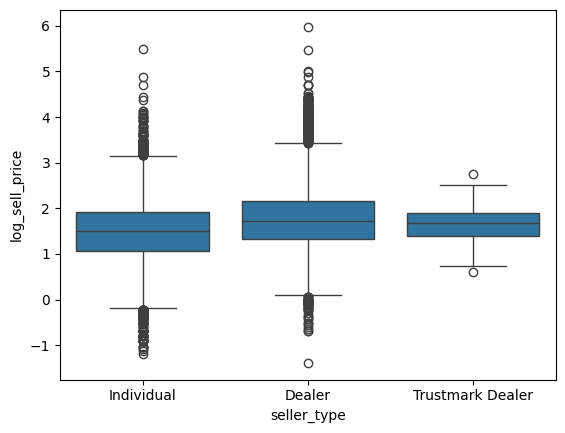

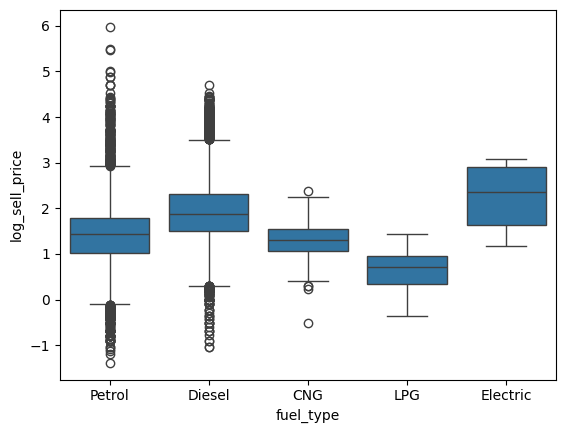

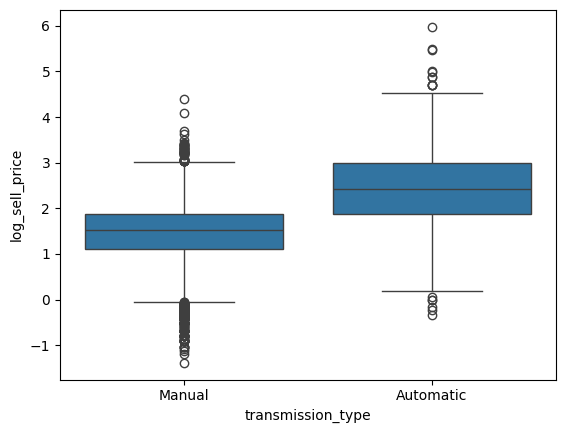

In [139]:
col=['seller_type','fuel_type','transmission_type']
for i in col:
    sns.boxplot(data=df,x=i,y='log_sell_price')
    plt.show()